In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Churn_data.xlsx')

In [3]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_deals,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others


In [4]:
data.dtypes

Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_deals                     object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            

In [5]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


In [6]:
data.isna().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_deals                    3297
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [7]:
data['Value_deals']=data['Value_deals'].fillna('Unknown')

In [8]:
data['Internet_Type']=data['Internet_Type'].fillna('Unknown')

In [9]:
data.isna().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_deals                    0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_status                0
Churn_Cate

In [10]:
#data precessing
data=data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [11]:
#list of columns to be label encoded
columns_to_encode=[
    'Gender','Married','State','Value_deals','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type',
    'Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies',
    'Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method'
]



In [12]:
# encode categoric cols except target variable
label_encoders={}
for col in columns_to_encode:
    label_encoders[col]=LabelEncoder()
    data[col]=label_encoders[col].fit_transform(data[col])

In [13]:
# manually encoding target variable 
data['Customer_status']=data['Customer_status'].map({'Stayed':0,'Churned':1})

In [15]:
# spitting data into features and target
X=data.drop('Customer_status',axis=1)
Y=data['Customer_status']

In [16]:
#split data into training and tetsting parts
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
X_train

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_deals,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
5632,0,60,0,9,4,12,1,1,1,0,...,0,1,1,0,24.450001,993.150024,41.330002,0,1205.290039,2157.110107
5838,0,38,1,18,4,17,1,1,0,1,...,0,0,0,0,56.250000,2419.550049,14.780000,40,1922.800049,4367.569824
2348,0,74,1,21,1,15,5,1,1,1,...,1,2,1,1,80.449997,3162.649902,0.000000,0,1714.939941,4877.589844
5332,0,48,1,21,5,18,3,1,0,1,...,1,1,1,0,59.799999,727.799988,0.000000,0,115.199997,843.000000
5661,1,21,0,6,1,3,5,1,1,0,...,0,2,0,0,24.450001,1730.650024,0.000000,0,2386.310059,4116.959961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,48,0,15,1,22,5,1,0,1,...,1,1,0,0,70.250000,2198.899902,0.000000,0,519.900024,2718.800049
5191,1,65,0,6,7,17,5,1,1,1,...,1,2,0,0,90.449997,5044.799805,12.480000,0,1250.699951,6283.020020
5226,1,51,0,8,4,36,4,0,0,1,...,1,0,1,0,42.599998,72.400002,0.000000,0,0.000000,72.400002
5390,1,51,0,19,11,8,2,1,0,1,...,1,1,0,1,59.450001,1507.000000,0.000000,0,84.760002,1591.760010


In [18]:
#model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
#fitting model

rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [19]:
#predict
Y_pred=rf_model.predict(X_test)


In [20]:
#evaluate

print("Confusion Matrix: ")
print(confusion_matrix(Y_test,Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test,Y_pred))


Confusion Matrix: 
[[767  59]
 [134 242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       826
           1       0.80      0.64      0.71       376

    accuracy                           0.84      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.84      0.84      0.83      1202



In [21]:
importances=rf_model.feature_importances_
indices=np.argsort(importances[::-1])

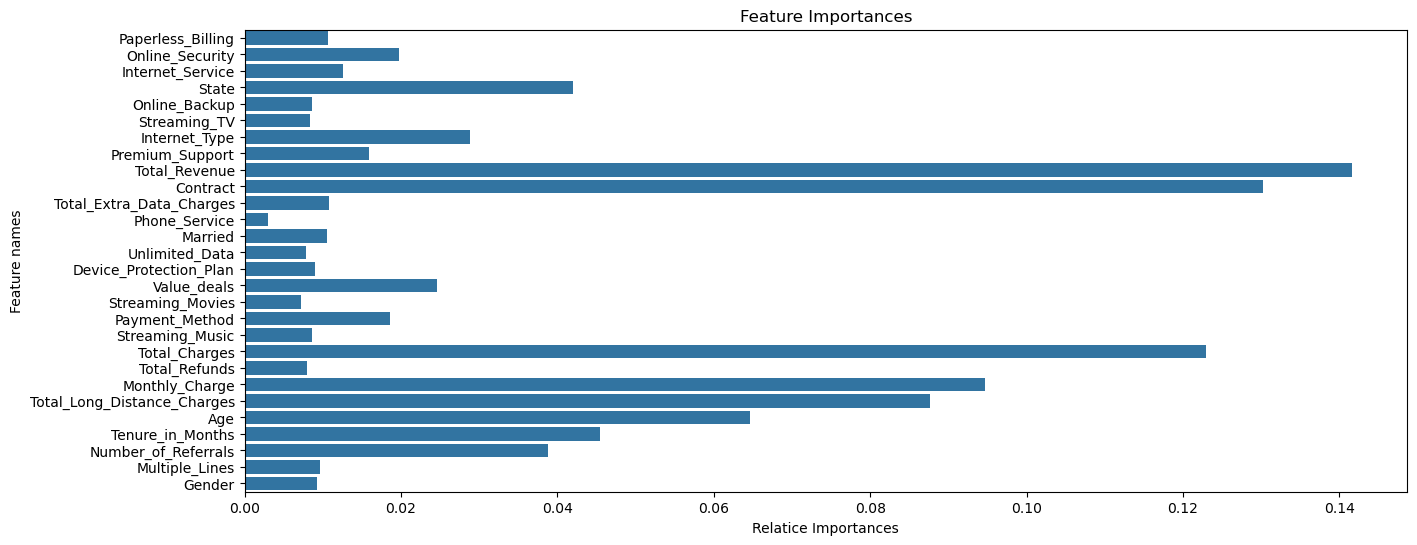

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relatice Importances')
plt.ylabel('Feature names')
plt.show()

In [23]:
#new data 

new_data=pd.read_excel('join_data.xlsx')

In [24]:
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_deals,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_status,Churn_Category,Churn_Reason
0,15591-KAR,Female,26,No,Karnataka,3,31,NaN,Yes,No,...,Credit Card,20.400000,20.400000,0.0,0,45.910000,66.309998,Joined,Others,Others
1,16032-AND,Female,47,No,Andhra Pradesh,8,18,NaN,Yes,No,...,Bank Withdrawal,46.599998,87.900002,0.0,0,3.740000,91.639999,Joined,Others,Others
2,16068-BIH,Female,44,Yes,Bihar,4,25,Deal 5,No,No,...,Bank Withdrawal,25.250000,25.250000,0.0,10,0.000000,35.250000,Joined,Others,Others
3,16244-UTT,Female,19,Yes,Uttar Pradesh,5,7,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,5.100000,24.650000,Joined,Others,Others
4,16733-ODI,Female,76,Yes,Odisha,10,1,NaN,Yes,No,...,Credit Card,45.849998,45.849998,0.0,0,40.380001,86.230003,Joined,Others,Others


In [25]:

#retaining original data to preserve encoded columns
original_data=new_data.copy()

In [26]:
#retaining customer ids
customer_ids=new_data['Customer_ID']

In [27]:
#dropping columns that won't be used for predictions
new_data=new_data.drop(['Customer_ID','Customer_status','Churn_Category','Churn_Reason'],axis=1)


In [28]:
#checking null values
new_data.isna().sum()

Gender                           0
Age                              0
Married                          0
State                            0
Number_of_Referrals              0
Tenure_in_Months                 0
Value_deals                    251
Phone_Service                    0
Multiple_Lines                   0
Internet_Service                 0
Internet_Type                  167
Online_Security                  0
Online_Backup                    0
Device_Protection_Plan           0
Premium_Support                  0
Streaming_TV                     0
Streaming_Movies                 0
Streaming_Music                  0
Unlimited_Data                   0
Contract                         0
Paperless_Billing                0
Payment_Method                   0
Monthly_Charge                   0
Total_Charges                    0
Total_Refunds                    0
Total_Extra_Data_Charges         0
Total_Long_Distance_Charges      0
Total_Revenue                    0
dtype: int64

In [29]:
#filling null values
new_data['Value_deals']=new_data['Value_deals'].fillna('Unknown')

In [30]:
new_data['Internet_Type']=new_data['Internet_Type'].fillna('Unknown')

In [31]:
new_data.isna().sum()

Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_deals                    0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
dtype: int64

In [32]:
#encoding categoric cols used in saved label encoders
for columns in new_data.select_dtypes(include=['object']).columns:
    new_data[columns]=label_encoders[columns].transform(new_data[columns])

In [33]:
#making new predictions
new_predictions=rf_model.predict(new_data)


In [34]:
new_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
#add predictions to original data
original_data['Customer_Status_Predicted']=new_predictions

In [38]:
#filtering data (which includes only records predicted as churned
original_data=original_data[original_data['Customer_Status_Predicted']==1]

In [42]:
#save result file
original_data.to_csv("Original_data.csv")